<a href="https://colab.research.google.com/github/ioloi1128/IPCS_1121_AACD/blob/main/IPCS1121_Read_TCCIP_using_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

More information:
https://plotly.com/python/


In [121]:
import xarray as xr
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

https://drive.google.com/file/d/1Jk1aqPqFRDAcIEV0DBuM2_RxjDXwbi6N/view?usp=sharing

Please download the data to your local disk

In [11]:
!gdown 1Jk1aqPqFRDAcIEV0DBuM2_RxjDXwbi6N

Downloading...
From: https://drive.google.com/uc?id=1Jk1aqPqFRDAcIEV0DBuM2_RxjDXwbi6N
To: /content/tavg.1960-2020.mon.5km-grid.nc
100% 14.2M/14.2M [00:00<00:00, 44.8MB/s]


In [3]:
filename ='tavg.1960-2020.mon.5km-grid.nc'
ds = xr.open_dataset(filename,decode_times=False)

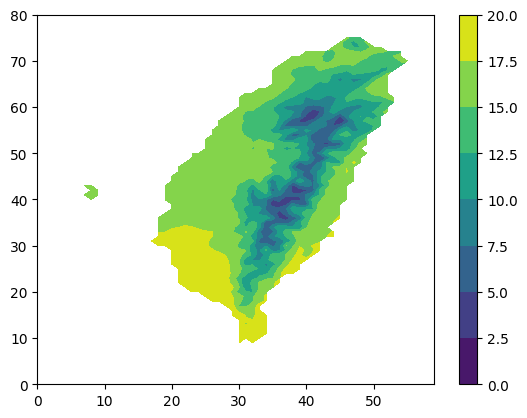

In [134]:
plt.contourf(ds['tavg'][0,:,:])
plt.colorbar()

In [122]:
#Write the time axis
time = pd.date_range(start='1960-01-01', end='2020-12-01', freq='MS')
ds.coords['time'] = time

In [123]:
# choose single point
dtc = ds.tavg.sel(lat=25.1,lon=121.31,method='nearest')
# calculus the annual mean
val_yr = dtc.groupby('time.year').mean(dim='time')
# calculus climatology
val_clm = dtc.mean()

In [124]:
# calculus anomaly
val_anom = (val_yr - val_clm).to_dataframe()

# calculus 5 years running mean
val_runave = (val_yr - val_clm).rolling(year=5, center=True).mean().to_dataframe()

In [125]:
# plot anomaly using bar plot
fig = px.bar(val_anom,x=val_anom.index,y='tavg',color='tavg')
fig.show()

In [126]:
# add title
fig = px.bar(val_anom,x=val_anom.index,y='tavg',color='tavg',title='TCCIP/5km Taipei Tavg')
fig.show()

In [127]:
# check data frame index
year=val_anom.index
year

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year')

In [128]:
val_yr
iyear=np.arange(1960,2021,1)
iyear

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

In [129]:
# calculus linear regression and plot
xval = np.arange(1960,2021,1)
yval = val_anom['tavg']

slope, intercept, r, p, se = linregress(xval,yval)
slope, intercept, r, p, se

(0.02028807877611698,
 -40.373276889544826,
 0.7459405497572423,
 5.271380221602504e-12,
 0.002358267702719283)

In [130]:
val_anom['tavg']

year
1960   -0.167410
1961   -0.138403
1962   -0.739588
1963   -0.583160
1964   -0.132339
          ...   
2016    0.894625
2017    0.827379
2018    0.682724
2019    0.796501
2020    0.979563
Name: tavg, Length: 61, dtype: float32

In [131]:
tavg_trend = val_anom
tavg_trend = intercept+slope*xval

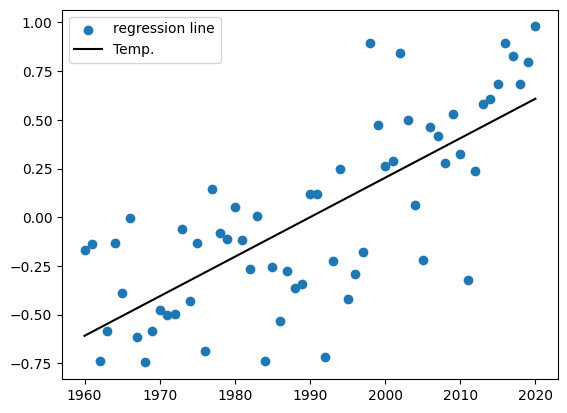

In [132]:
plt.scatter(xval,yval)
plt.plot(xval,tavg_trend, 'k')

plt.legend(['regression line','Temp.'])

In [133]:
# method 1 plot overlay :
fig = px.line(tavg_trend , x=val_anom.index,y=tavg_trend,color=px.Constant('Trend'))
fig.add_bar(x=val_anom.index,y=val_anom.tavg,name='anomaly')
# Update layout to add labels or other annotations
fig.update_layout(
    title='Averagre temperature in Taipei from 1960-2020',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Anomaly (degree C)'),
    annotations=[
        dict(
            x=1,
            y=1,
            xref='paper',
            yref='paper',
            text='Trend = 0.2 C/decade',
            showarrow=False
        )
    ]
)
fig.show()

In [118]:
# method 2 of plot overlay
fig = go.Figure()
fig.add_trace(go.Bar(x=val_anom.index,y=val_anom['tavg'],
                     marker_color=val_anom['tavg'],name='anomaly'))
fig.add_trace(go.Scatter(x=year, y=tavg_trend,
                         line=dict(color='red'), name='Trend'))
fig.update_layout(
    title='Averagre temperature in Taipei from 1960-2020',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Anomaly (degree C)'),
    annotations=[
        dict(
            x=1,
            y=1,
            xref='paper',
            yref='paper',
            text='Trend = 0.2 C/decade',
            showarrow=False
        )
    ]
)
fig.show()

In-class exercises:

Taipei:
Lat 24.05N, Lon 131.31E

Kaohsiung:
Lat 22.38N, Lon 120.16E

Yu Shan:
Lat 22.28N, Lon 120.57E

Level 1:
Choose any two locations. Plot their timeseries and compare the diffierence.


In-class Exercise
Level 2 : Reproduce level with year from 1990-2020 only.

Hint: Select time period and repeat again

In [139]:
ds_1990_2000 = ds.sel(time=slice('1990-01-01', '2000-12-31'))

In [140]:
print(ds_1990_2000)

<xarray.Dataset>
Dimensions:    (time: 132, bnds: 2, lon: 60, lat: 81)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2000-12-01
  * lon        (lon) float32 119.2 119.2 119.3 119.3 ... 122.0 122.0 122.1 122.1
  * lat        (lat) float32 21.5 21.55 21.6 21.65 ... 25.35 25.4 25.45 25.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    tavg       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Sep 21 18:44:36 2023: cdo mergetime tavg.1960.mon.5km-g...
    frequency:    mon
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...
